## Audio File Preprocessing

### One common method for processing audio file is STFT (Short Time Fourier Transform) and FFT (Fast Fourier Transform)

### Another methor for processing audio file is MFCC (Mel-frequency Cepstral Coefficients)

magnitude shape: (1025, 44)
frequency shape: (1025,)


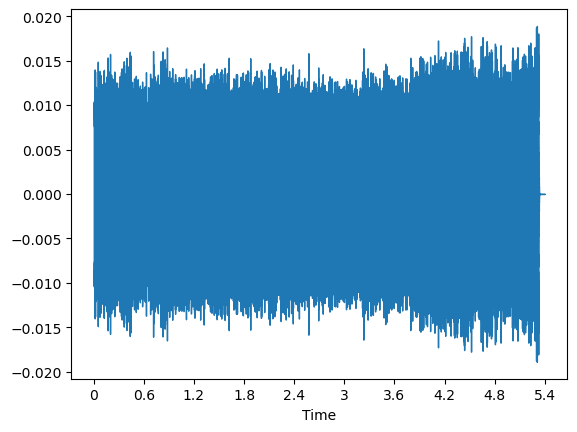

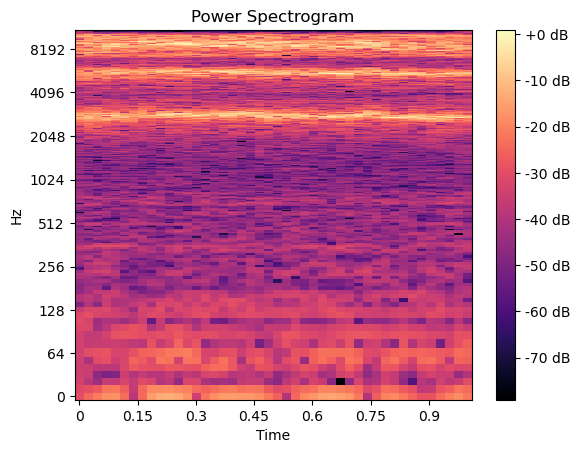

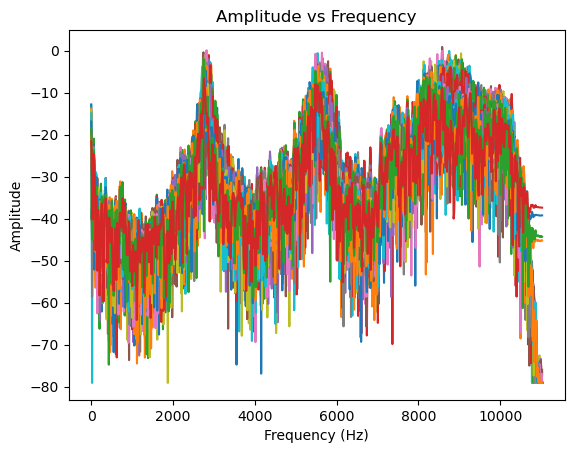

In [62]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = 'plasma_0001.wav'
audio, sr = librosa.load(audio_file)

start_time = 2
end_time = 3

# compute start and end samples
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

audio_portion = audio[start_sample:end_sample]

# Compute STFT
n_fft = 2048
stft = librosa.stft(audio_portion, n_fft=n_fft)

# Compute magnitude spectrogram
mag_spec = librosa.amplitude_to_db(abs(stft))
amplitude = np.abs(stft)

# Compute frequency vector
freqs = librosa.core.fft_frequencies(n_fft=n_fft)

print('magnitude shape: ' + str(mag_spec.shape))
print('frequency shape: ' + str(freqs.shape))

# Create figure and subplots
#fig, axs = plt.subplots(nrows=1, sharex=True)

# Plot audio signal in first subplot
fig = plt.figure()
librosa.display.waveshow(audio, sr=sr)
plt.show()

# Plot magnitude spectrogram in second subplot
fig, ax = plt.subplots()
img = librosa.display.specshow(mag_spec, y_axis='log', x_axis='time',ax = ax)

ax.set_title('Power Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# plot amplitude vs frequency
plt.plot(frequencies, mag_spec)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.show()

In [44]:
print(frequencies[:10])

[ 0.         10.76660156 21.53320312 32.29980469 43.06640625 53.83300781
 64.59960938 75.36621094 86.1328125  96.89941406]


In [45]:
print(amplitude[:10])

[[0.38704938 0.41840807 0.09400379 ... 0.4011918  0.01728285 0.        ]
 [0.33309656 0.39103937 0.16065903 ... 0.37065285 0.01711271 0.        ]
 [0.21615484 0.18158166 0.18981615 ... 0.29404458 0.01661553 0.        ]
 ...
 [0.11605602 0.11075599 0.06438277 ... 0.27116933 0.01102651 0.        ]
 [0.09862061 0.07954583 0.03619521 ... 0.1620734  0.00972551 0.        ]
 [0.06455231 0.04615573 0.02707618 ... 0.06390089 0.00847721 0.        ]]


In [57]:
print(amplitude.shape)

(1025, 26)


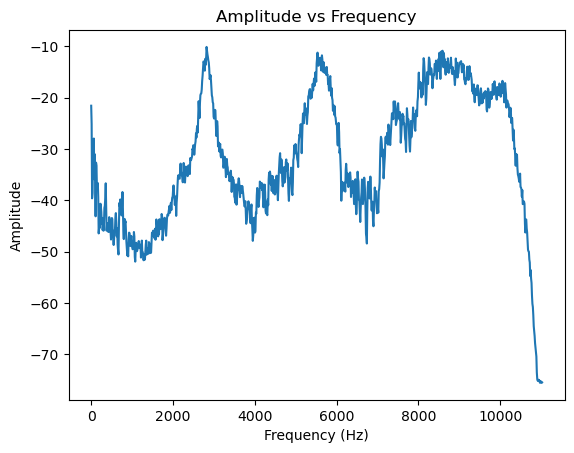

In [64]:
average_amplitude = np.mean(mag_spec, axis=1)
plt.plot(frequencies, average_amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.show()

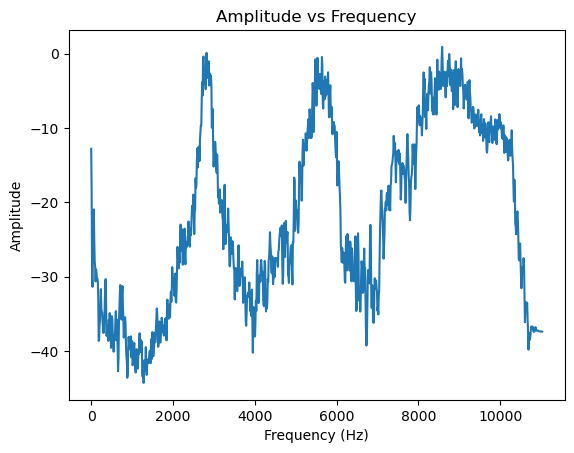

In [65]:
max_amplitude = np.max(mag_spec, axis=1)
plt.plot(frequencies, max_amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.show()

### Use wavfile library for audio preprocessing

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile

# Load audio file
audio_file = 'plasma_0001.wav'
sr, signal = wavfile.read(audio_file)

# Apply FFT
spectrum = np.fft.fft(signal)

# Calculate magnitudes of complex spectrum
magnitudes = np.abs(spectrum)

# Convert magnitudes to decibels (dB)
magnitudes_dB = 20 * np.log10(magnitudes)

# Normalize magnitudes to range [0, 1]
max_mag = np.max(magnitudes_dB)
magnitudes_norm = magnitudes_dB / max_mag

# Convert magnitudes to matrix dataset
dataset = magnitudes_norm.reshape(-1, 1)

print(dataset.shape)  # Output: (num_samples, 1)


### Another methor for processing audio file is MFCC (Mel-frequency Cepstral Coefficients)

In [21]:
import librosa
import numpy as np

# Load audio file
audio_file = 'plasma_0001.wav'
y, sr = librosa.load(audio_file)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Normalize MFCCs
mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

# Convert MFCCs to matrix dataset
dataset = mfccs.T

print(dataset.shape)  # Output: (num_frames, num_mfcc)

(233, 13)
